For this practical work, will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
x = np.linspace(0,20)
y=-1*x+2

theta=np.matrix([0,0])


dict={'x0':1,'x1':x , 'y':y}

df=pd.DataFrame(dict)
df = df.sample(frac=1)


col=df.shape[1]
x=np.matrix(df.iloc[:,0:col-1])
y=np.matrix(df.iloc[:,col-1:col])




In [ ]:
print(" x = \n",x.shape)
print(" y = \n",y.shape)

 x = 
 (50, 2)
 y = 
 (50, 1)


#### Plot your data points. 

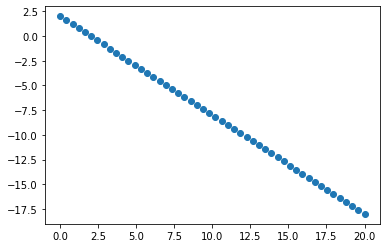

In [ ]:
plt.scatter(df.x1,df.y)

In [ ]:
def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse

In [ ]:
def gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(theta.shape))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(x) * np.sum(t)
    grad=temp
    return grad

In [ ]:
def momentum_vt(x,y,theta,v,gama,lr):
    if len(v)== 0:
        v.append(np.matrix([0,0]))
        return v

    v.append((gama * v[-1]) + (lr * gradient(x,y,theta)))
    
    return v

In [ ]:
def momentum_GD(X,Y,Theta,LearnRate,iteration,gama):  
    temp = np.matrix(np.zeros(Theta.shape))
    cost = np.zeros(iteration)                       
    theta_parameters=int(Theta.ravel().shape[1])     
    tt0=[]
    tt1=[]
    h=[]
    v=[]
    for i in range(iteration):
        
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        h.append(X*Theta.T)
        cost[i] = GDCostFunction(X,Y,Theta) 
        
        vt = momentum_vt(X,Y,Theta,v,gama,LearnRate)
        
        temp = Theta - vt[-1]
        
        Theta=temp
        
       
    return Theta , cost,tt0,tt1,h,vt

In [ ]:
alpha=0.004
itera=100
gama=0.6
theta_new,cost,th_0,th_1,hypo ,vt = momentum_GD(x,y,theta,alpha,itera,gama)
theta_new

matrix([[ 0.3949829 , -0.88061259]])

In [ ]:
y_hat=theta_new[0,0] + theta_new[0,1]*df.x1


Text(0, 0.5, 'Cost Value')

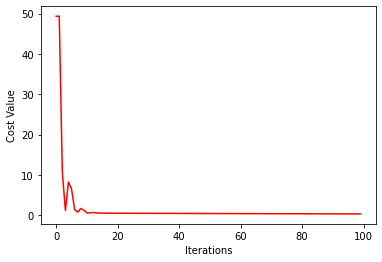

In [ ]:
fig,ax = plt.subplots()
ax.plot(np.arange(itera), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

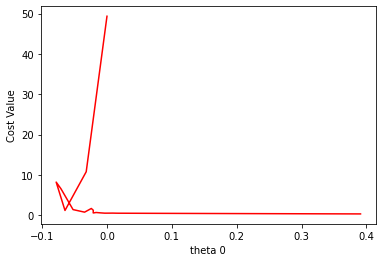

In [ ]:
fig,ax = plt.subplots()
ax.plot(th_0, cost ,'r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

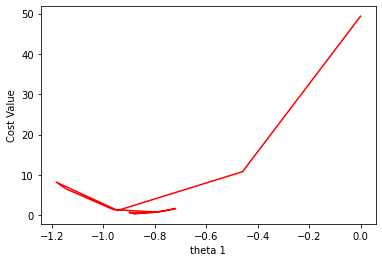

In [ ]:
fig,ax = plt.subplots()
ax.plot(th_1, cost ,'r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

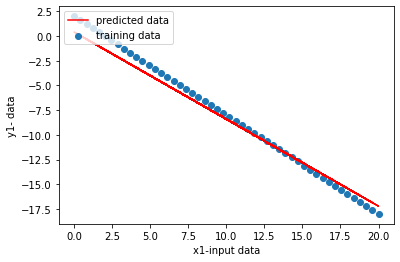

In [ ]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

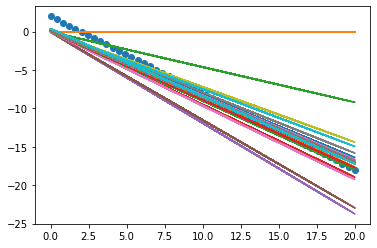

In [ ]:
th_0=np.array(th_0)
th_0=th_0.ravel()
th_1=np.array(th_1)
th_1=th_1.ravel()

plt.scatter(df.x1,df.y)
for i in  hypo:
    plt.plot(df.x1,i)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_score(df.y , y_hat) * 100

98.08743581688157

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

![image.png](attachment:image.png)

#### γ takes values between 0 and 1.
![image.png](attachment:image.png)

In [ ]:
def NAG_vt(x,y,theta,v,gama,lr):
    if len(v)== 0:
        v.append(np.matrix([0,0]))
        theta_new=np.matrix([0,0])
        return theta_new ,v
    theta_temp=theta-gama*v[-1]
    
    w_grad=lr*gradient(x,y,theta_temp)
    
    theta_new= theta_temp - w_grad
    
    v.append((gama * v[-1]) + w_grad)
    
    return theta_new ,v

In [ ]:
def Batch_GD_NAG(X,Y,Theta,LearnRate,iteration,gama):  
    temp = np.matrix(np.zeros(Theta.shape))
    theta_parameters=int(Theta.ravel().shape[1])     
    cost=[]
    tt0=[]
    tt1=[]
    h=[]
    v=[]
    for i in range(iteration):
        
        tt0.append(Theta[:,0])
        tt1.append(Theta[:,1])
        h.append(X*Theta.T)
        cost.append(GDCostFunction(X,Y,Theta) )
        
        thetaNag,vt = NAG_vt(X,Y,Theta,v,gama,LearnRate)
        
        temp = thetaNag
        
        Theta=temp
        
       
    return Theta , cost,tt0,tt1,h,vt

In [ ]:
alpha=0.0005
itera=100
gama=1

In [ ]:
th_op,cost,th0,th1,hypo ,vt =Batch_GD_NAG(x,y,theta,alpha,itera,gama)
th_op

matrix([[ 1.10885146, -0.91789063]])

Text(0, 0.5, 'y1- data')

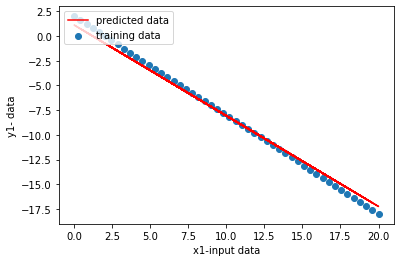

In [ ]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

Text(0, 0.5, 'Cost Value')

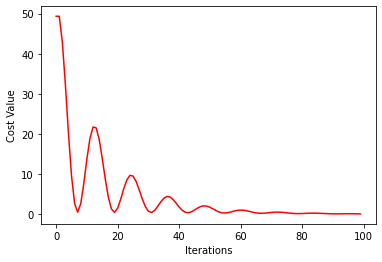

In [ ]:
fig,ax = plt.subplots()
ax.plot(np.arange(itera), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

In [ ]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

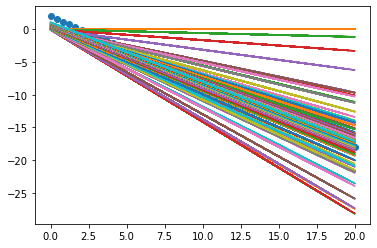

In [ ]:
plt.scatter(df.x1,df.y)
for i in  hypo:
    plt.plot(df.x1,i)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

Text(0, 0.5, 'Cost Value')

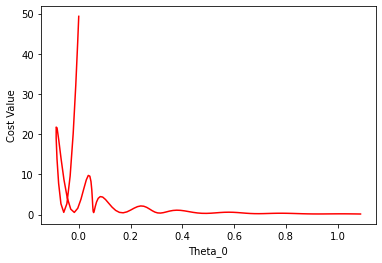

In [ ]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

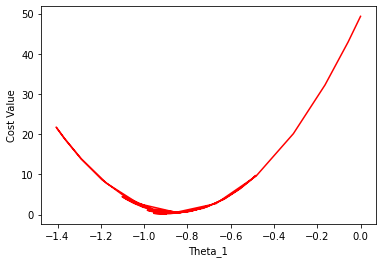

In [ ]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')





In [ ]:
r2_score(df.y , y_hat) * 100

99.31165952023308

### Update your Batch GD for one variable  implementation to be NAG and check your results

![image.png](attachment:image.png)